<a href="https://colab.research.google.com/github/Yisahak/Yisahak/blob/main/Solar_Radiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import RobustScaler
from mlxtend.regressor import StackingCVRegressor

import sklearn.metrics as sklm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import mean_squared_log_error as msle 
from sklearn.metrics import multilabel_confusion_matrix as mcm

import numpy as np # linear algebra
from numpy import newaxis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from keras.optimizers import SGD, Adam
from keras.layers import LSTM,Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout







# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
mw_data =pd.read_csv('/content/MW_LOG new1.csv')

In [69]:
mw_data['Date'] = pd.to_datetime(mw_data['Date'], infer_datetime_format= True)

In [70]:
mw_data['Fault_Type'] = mw_data['A3'].astype('str') + mw_data['F2'].astype('str') + mw_data['G2'].astype('str') + mw_data['I2'].astype('str') + mw_data['I3'].astype('str') + mw_data['J3'].astype('str') + mw_data['K3'].astype('str') + mw_data['L2'].astype('str') + mw_data['M2'].astype('str') + mw_data['T2'].astype('str')
mw_data.head()

,Date,Severity_id,RTN_id,OptiX RTN 905,OptiX RTN 980,OptiX RTN 950A,OptiX RTN 380A,OptiX RTN 380AX,A3,F2,G2,I2,I3,J3,K3,L2,M2,T2,Fault_Type
0,2022-11-10 15:49:00,3,146,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0000000010
1,2022-11-10 15:49:00,3,640,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0000100000
2,2022-11-10 15:51:00,3,1349,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0001000000
3,2022-11-10 15:52:00,1,688,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0000000100
4,2022-11-10 15:53:00,3,19,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0000000010


In [ ]:
mw_data['year'] = mw_data.Date.dt.year
mw_data['month'] = mw_data.Date.dt.month
mw_data['Day_of_week'] = mw_data.Date.dt.dayofweek
mw_data['hour'] = mw_data.Date.dt.hour

In [72]:
mw_data.head()

,Date,Severity_id,RTN_id,OptiX RTN 905,OptiX RTN 980,OptiX RTN 950A,OptiX RTN 380A,OptiX RTN 380AX,A3,F2,...,J3,K3,L2,M2,T2,Fault_Type,year,month,Day_of_week,hour
0,2022-11-10 15:49:00,3,146,0,0,1,0,0,0,0,...,0,0,0,1,0,0000000010,2022,11,3,15
1,2022-11-10 15:49:00,3,640,0,0,1,0,0,0,0,...,0,0,0,0,0,0000100000,2022,11,3,15
2,2022-11-10 15:51:00,3,1349,0,0,1,0,0,0,0,...,0,0,0,0,0,0001000000,2022,11,3,15
3,2022-11-10 15:52:00,1,688,1,0,0,0,0,0,0,...,0,0,1,0,0,0000000100,2022,11,3,15
4,2022-11-10 15:53:00,3,19,0,0,1,0,0,0,0,...,0,0,0,1,0,0000000010,2022,11,3,15


In [73]:
mw_data = mw_data.drop(mw_data.columns[[0, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]], axis=1)  # df.columns is zero-based pd.Index
mw_data.head()

,Severity_id,RTN_id,OptiX RTN 905,OptiX RTN 980,OptiX RTN 950A,OptiX RTN 380A,OptiX RTN 380AX,Fault_Type,year,month,Day_of_week,hour
0,3,146,0,0,1,0,0,0000000010,2022,11,3,15
1,3,640,0,0,1,0,0,0000100000,2022,11,3,15
2,3,1349,0,0,1,0,0,0001000000,2022,11,3,15
3,1,688,1,0,0,0,0,0000000100,2022,11,3,15
4,3,19,0,0,1,0,0,0000000010,2022,11,3,15


In [74]:
mw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105697 entries, 0 to 105696
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Severity_id      105697 non-null  int64 
 1   RTN_id           105697 non-null  int64 
 2   OptiX RTN 905    105697 non-null  int64 
 3   OptiX RTN 980    105697 non-null  int64 
 4   OptiX RTN 950A   105697 non-null  int64 
 5   OptiX RTN 380A   105697 non-null  int64 
 6   OptiX RTN 380AX  105697 non-null  int64 
 7   Fault_Type       105697 non-null  object
 8   year             105697 non-null  int64 
 9   month            105697 non-null  int64 
 10  Day_of_week      105697 non-null  int64 
 11  hour             105697 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 9.7+ MB


convert categorical to nominal data

In [75]:
# Convert categorical value to numerical values. For holiday attribute, value will be within by 0 and 1. If it is holiday then 1 otherwise 0
label_encoder = preprocessing.LabelEncoder()
mw_data['Fault_Type'] = label_encoder.fit_transform(mw_data['Fault_Type'])

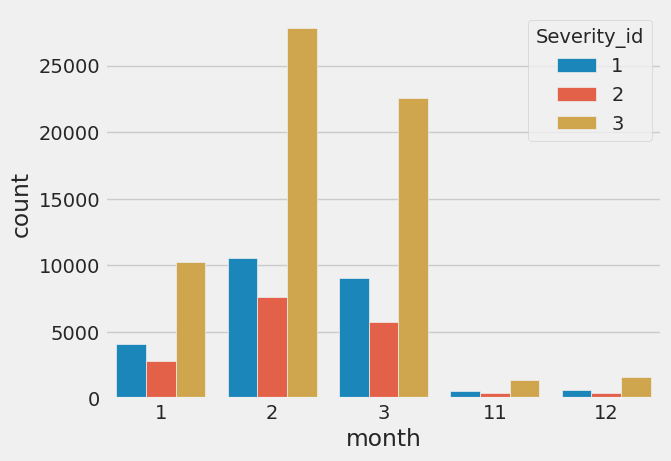

In [76]:
ax = sns.countplot(x = "month", hue ="Severity_id", data = mw_data)
plt.show()

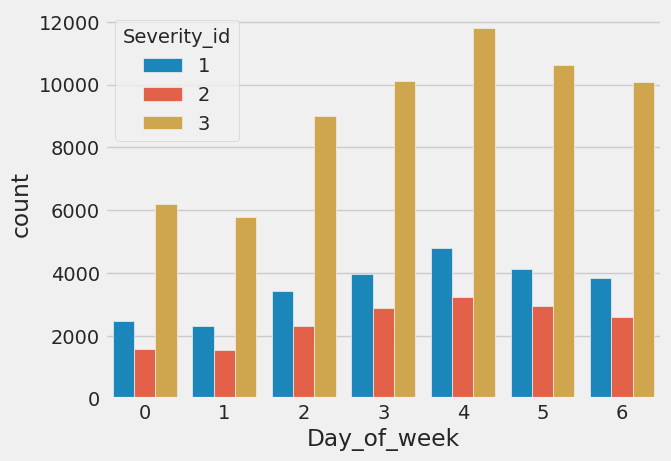

In [77]:
ax = sns.countplot(x='Day_of_week',hue='Severity_id',data=mw_data)
plt.show()

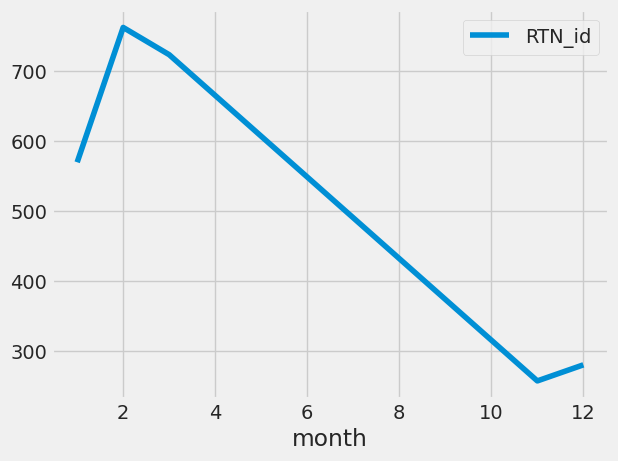

In [78]:
mw_data.groupby('month').agg({'RTN_id':lambda x: x.nunique()}).plot()
plt.show()

In [79]:
trainData=mw_data.iloc[:84557]
testData=mw_data.iloc[84557:]

In [80]:
trainData.head()

,Severity_id,RTN_id,OptiX RTN 905,OptiX RTN 980,OptiX RTN 950A,OptiX RTN 380A,OptiX RTN 380AX,Fault_Type,year,month,Day_of_week,hour
0,3,146,0,0,1,0,0,1,2022,11,3,15
1,3,640,0,0,1,0,0,5,2022,11,3,15
2,3,1349,0,0,1,0,0,6,2022,11,3,15
3,1,688,1,0,0,0,0,2,2022,11,3,15
4,3,19,0,0,1,0,0,1,2022,11,3,15


In [81]:
testData.head()

,Severity_id,RTN_id,OptiX RTN 905,OptiX RTN 980,OptiX RTN 950A,OptiX RTN 380A,OptiX RTN 380AX,Fault_Type,year,month,Day_of_week,hour
84557,2,1465,0,0,1,0,0,9,2023,3,2,5
84558,3,1061,1,0,0,0,0,6,2023,3,2,5
84559,3,1347,0,0,1,0,0,6,2023,3,2,5
84560,3,1030,0,0,1,0,0,6,2023,3,2,5
84561,3,177,0,0,1,0,0,6,2023,3,2,5


In [100]:
trainData.info() ## check types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84557 entries, 0 to 84556
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Severity_id      84557 non-null  int64
 1   RTN_id           84557 non-null  int64
 2   OptiX RTN 905    84557 non-null  int64
 3   OptiX RTN 980    84557 non-null  int64
 4   OptiX RTN 950A   84557 non-null  int64
 5   OptiX RTN 380A   84557 non-null  int64
 6   OptiX RTN 380AX  84557 non-null  int64
 7   Fault_Type       84557 non-null  int64
 8   year             84557 non-null  int64
 9   month            84557 non-null  int64
 10  Day_of_week      84557 non-null  int64
 11  hour             84557 non-null  int64
dtypes: int64(12)
memory usage: 7.7 MB


In [101]:
testData.info() ## check types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21140 entries, 84557 to 105696
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Severity_id      21140 non-null  int64
 1   RTN_id           21140 non-null  int64
 2   OptiX RTN 905    21140 non-null  int64
 3   OptiX RTN 980    21140 non-null  int64
 4   OptiX RTN 950A   21140 non-null  int64
 5   OptiX RTN 380A   21140 non-null  int64
 6   OptiX RTN 380AX  21140 non-null  int64
 7   Fault_Type       21140 non-null  int64
 8   year             21140 non-null  int64
 9   month            21140 non-null  int64
 10  Day_of_week      21140 non-null  int64
 11  hour             21140 non-null  int64
dtypes: int64(12)
memory usage: 1.9 MB


In [102]:
trainData.isnull().sum() #Checking number of null values

Severity_id        0
RTN_id             0
OptiX RTN 905      0
OptiX RTN 980      0
OptiX RTN 950A     0
OptiX RTN 380A     0
OptiX RTN 380AX    0
Fault_Type         0
year               0
month              0
Day_of_week        0
hour               0
dtype: int64

In [103]:
testData.isnull().sum() #Checking number of null values

Severity_id        0
RTN_id             0
OptiX RTN 905      0
OptiX RTN 980      0
OptiX RTN 950A     0
OptiX RTN 380A     0
OptiX RTN 380AX    0
Fault_Type         0
year               0
month              0
Day_of_week        0
hour               0
dtype: int64

<ipython-input-104-834bcbe9a44c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainData['Fault_Type'])


<Axes: xlabel='Fault_Type', ylabel='Density'>

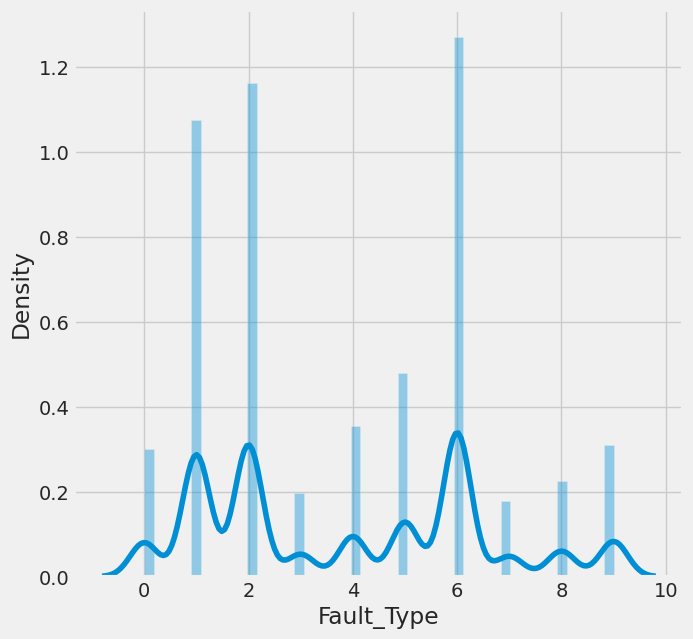

In [104]:
plt.figure(figsize=(7, 7))
sns.distplot(trainData['Fault_Type'])

<ipython-input-87-4ef046935792>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(testData['Fault_Type'])


<Axes: xlabel='Fault_Type', ylabel='Density'>

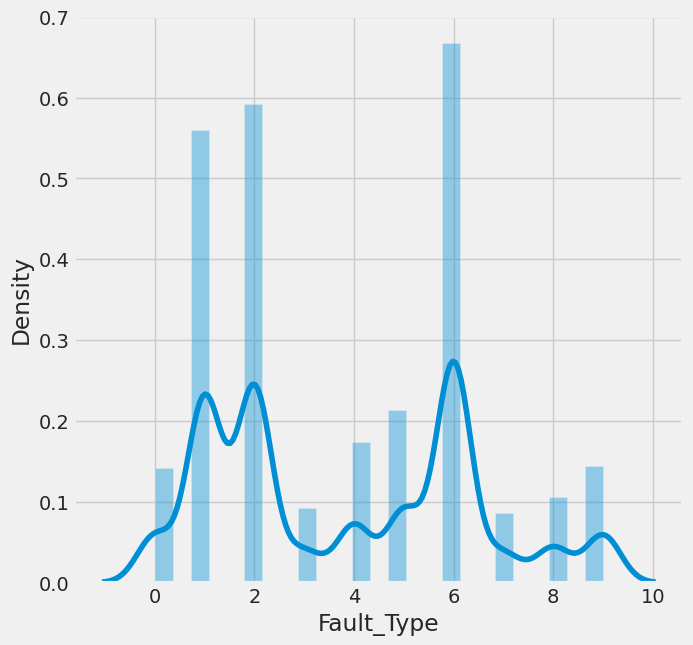

In [87]:
plt.figure(figsize=(7, 7))
sns.distplot(testData['Fault_Type'])

<Axes: >

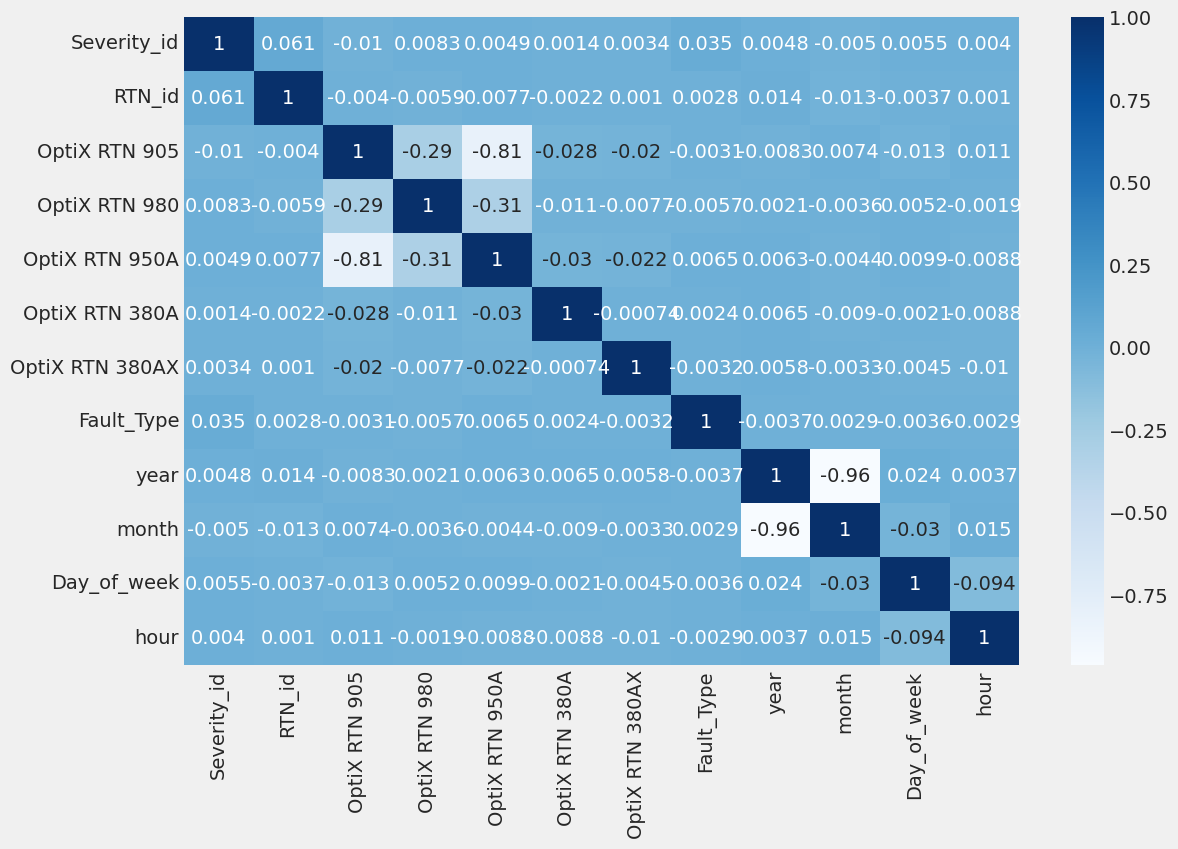

In [88]:
plt.figure(figsize=(12,8))
sns.heatmap(trainData.corr(),annot=True,cmap='Blues')

<Axes: >

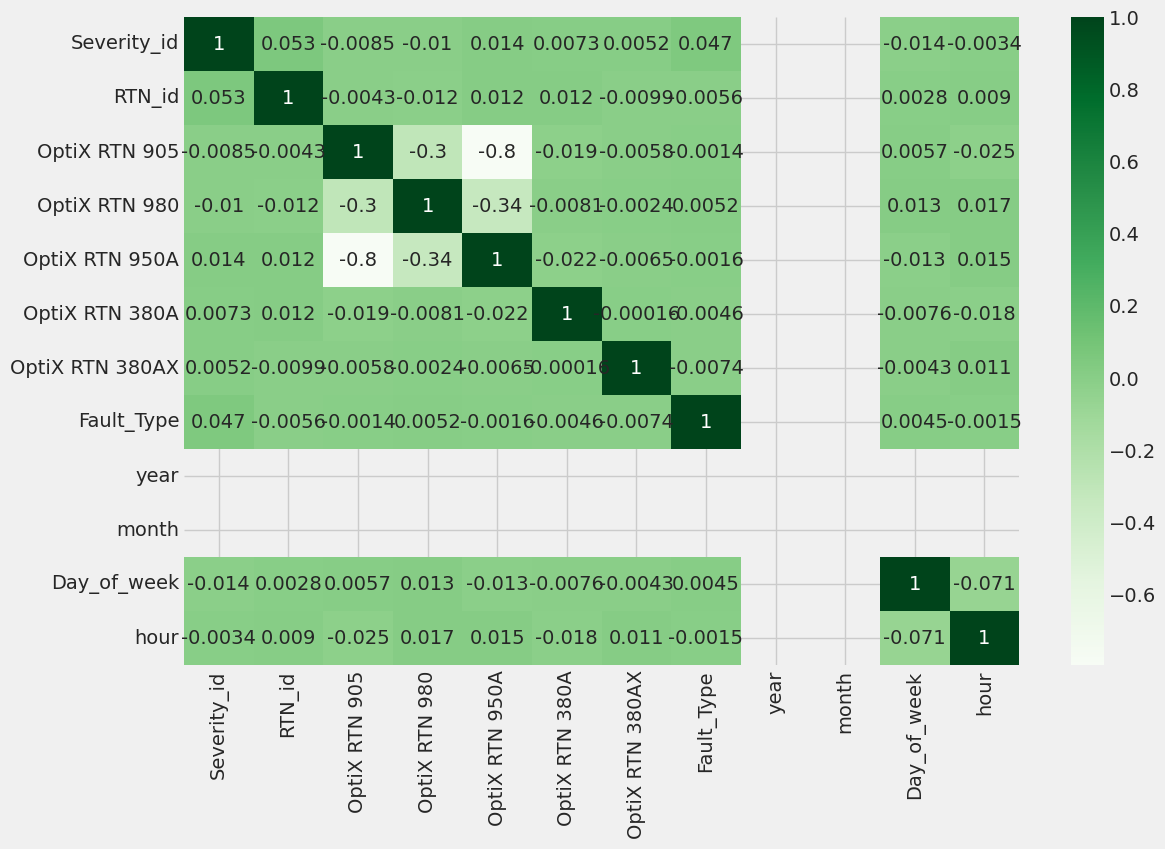

In [89]:
plt.figure(figsize=(12,8))
sns.heatmap(testData.corr(),annot=True,cmap='Greens')

In [90]:
#sns.pairplot(trainData)

In [91]:
#sns.pairplot(testData)

In [92]:
X_train= trainData.drop( ['Fault_Type','year'],axis =1)

In [93]:
y_train= trainData['Fault_Type']

In [94]:
X_test= testData.drop( ['Fault_Type','year'],axis =1)
y_test= testData['Fault_Type']

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow.compat.v2 as tf

import abc
import types

import numpy as np
import six
from tensorflow.python.eager import def_function
from keras import activations
from keras import backend as K
from keras.engine import base_layer


from keras.losses import binary_crossentropy
from keras.losses import categorical_crossentropy
from keras.losses import categorical_hinge
from keras.losses import hinge
from keras.losses import kullback_leibler_divergence
from keras.losses import logcosh
from keras.losses import mean_absolute_error
from keras.losses import mean_absolute_percentage_error as mape
from keras.losses import mean_squared_error
from keras.losses import mean_squared_logarithmic_error as msle
from keras.losses import poisson
from keras.losses import sparse_categorical_crossentropy
from keras.losses import squared_hinge



In [ ]:
model = Sequential()
    
model.add(Dense(128, activation='relu', input_dim=10))
model.add(Dropout(0.1))
    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='linear'))

model.compile(metrics=['mape','mae', 'msle', 'logcosh', 'poisson'], loss='mse', optimizer=Adam(learning_rate= 0.001))
history = model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
84557/84557 [==============================] - 223s 3ms/step - loss: 4.8881 - mape: 180225552.0000 - mae: 1.9543 - msle: 0.3419 - logcosh: 1.3446 - poisson: nan
Epoch 2/100
84557/84557 [==============================] - 200s 2ms/step - loss: 4.4398 - mape: 171076928.0000 - mae: 1.8448 - msle: 0.3209 - logcosh: 1.2468 - poisson: nan
Epoch 3/100
84557/84557 [==============================] - 193s 2ms/step - loss: 4.3673 - mape: 168810128.0000 - mae: 1.8223 - msle: 0.3168 - logcosh: 1.2270 - poisson: nan
Epoch 4/100
84557/84557 [==============================] - 202s 2ms/step - loss: 4.3087 - mape: 167327200.0000 - mae: 1.8002 - msle: 0.3129 - logcosh: 1.2090 - poisson: nan
Epoch 5/100
84557/84557 [==============================] - 212s 3ms/step - loss: 4.2885 - mape: 166712688.0000 - mae: 1.7881 - msle: 0.3114 - logcosh: 1.1993 - poisson: nan
Epoch 6/100
84557/84557 [==============================] - 208s 2ms/step - loss: 4.2448 - mape: 164869392.0000 - mae: 1.7762 - msle: 0.

95/95 [==============================] - 0s 1ms/step - loss: 0.3428 - mape: 12.8639 - mae: 0.4449 - msle: 0.0159 - logcosh: 0.1459 - poisson: -1.4391
Mean absolute error: 0.3428102433681488. Mean squared error: 12.863938331604004.


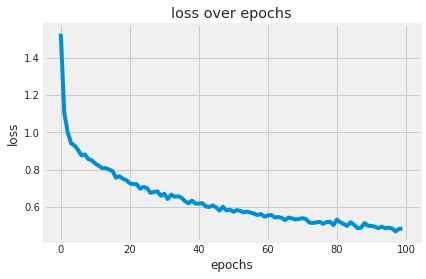

/n


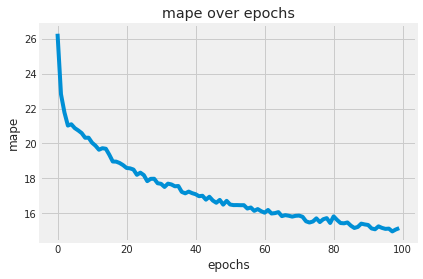

/n


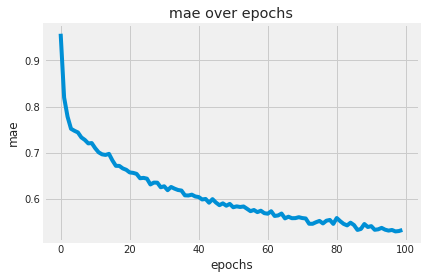

/n


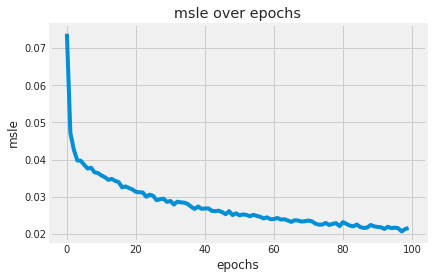

/n


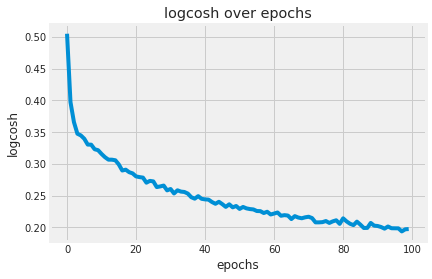

/n


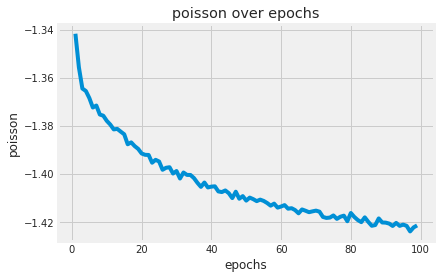

/n


In [ ]:

fit = history.history
scores = model.evaluate(X_train, y_train)
mae = scores[0]
mse = scores[1]
print('Mean absolute error: ' + str(mae) + '. Mean squared error: ' + str(mse) + '.')

for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()
    print('/n')

In [ ]:
pred_Dense = model.predict(X_test)

In [ ]:
MSE(y_test, pred_Dense)

1.222723545696496

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE 

In [ ]:
MAE(y_test, pred_Dense)

0.8473854567879745

In [ ]:
 
 
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred_Dense)) 
print("RMSE : % f" %(rmse)) 

RMSE :  1.105768


In [ ]:
r2_score(y_test, pred_Dense)

-0.005054183445695637

In [ ]:
msle(y_test, pred_Dense)

<tf.Tensor: shape=(970,), dtype=float32, numpy=
array([0.05315255, 0.06022843, 0.05239851, 0.06108093, 0.12533474,
       0.12752372, 0.06407775, 0.05326708, 0.11957463, 0.05297034,
       0.05082315, 0.0816465 , 0.05799638, 0.07468933, 0.05092446,
       0.0508913 , 0.05114892, 0.05892103, 0.06497641, 0.07932203,
       0.05595567, 0.12311139, 0.13697723, 0.06838989, 0.05815936,
       0.06454409, 0.0626682 , 0.07046963, 0.06445935, 0.06945498,
       0.05141444, 0.05082833, 0.05486798, 0.05361001, 0.05238049,
       0.06747862, 0.07509231, 0.1115533 , 0.1490147 , 0.06596421,
       0.09308591, 0.11029234, 0.08357248, 0.08127555, 0.08069208,
       0.12016734, 0.1074629 , 0.12225378, 0.07825359, 0.06354184,
       0.09212837, 0.05854708, 0.10831594, 0.08626024, 0.0804678 ,
       0.0665409 , 0.0574626 , 0.05248466, 0.13216722, 0.13787788,
       0.05554955, 0.07920727, 0.08861016, 0.11700165, 0.05076136,
       0.06802948, 0.05699499, 0.06015701, 0.05811604, 0.05073723,
       0.05160

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y_test, pred_Dense)

32.080995148561485

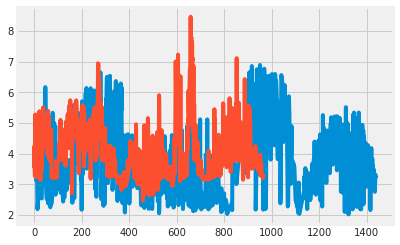

In [ ]:


plt.plot(y_test)
plt.plot(pred_Dense)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'higher right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


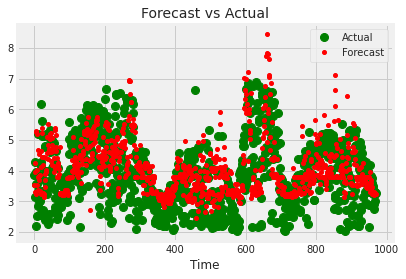

In [ ]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=8, label="Actual", color='green')
plt.plot(pd.Series(np.ravel(pred_Dense)), "r.", markersize=8, label="Forecast", color='red')
plt.legend(loc="higher right")
plt.xlabel("Time")

plt.show()

In [ ]:
X_train_LSTM = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_LSTM = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train_LSTM.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))

model.add(Dense(16))
model.add(Dense(1))

# Compile the model


model.compile(metrics=['mape','mae', 'msle', 'logcosh', 'poisson'], loss='mse', optimizer=Adam(learning_rate=0.001))
#Train the model
#model.fit(X_train, y_train, batch_size=1, epochs=1)
history = model.fit(X_train_LSTM, y_train, epochs=150, batch_size=1)

Epoch 1/150
3027/3027 [==============================] - 24s 7ms/step - loss: 1.2234 - mape: 24.8744 - mae: 0.8781 - msle: 0.0577 - logcosh: 0.4377 - poisson: nan
Epoch 2/150
3027/3027 [==============================] - 20s 6ms/step - loss: 1.0236 - mape: 22.7365 - mae: 0.8016 - msle: 0.0436 - logcosh: 0.3795 - poisson: -1.3535
Epoch 3/150
3027/3027 [==============================] - 20s 7ms/step - loss: 1.0017 - mape: 22.3539 - mae: 0.7884 - msle: 0.0426 - logcosh: 0.3721 - poisson: -1.3566
Epoch 4/150
3027/3027 [==============================] - 20s 6ms/step - loss: 0.9811 - mape: 22.0776 - mae: 0.7792 - msle: 0.0417 - logcosh: 0.3649 - poisson: -1.3592
Epoch 5/150
3027/3027 [==============================] - 20s 7ms/step - loss: 0.9522 - mape: 21.7997 - mae: 0.7687 - msle: 0.0406 - logcosh: 0.3568 - poisson: -1.3632
Epoch 6/150
3027/3027 [==============================] - 20s 7ms/step - loss: 0.9321 - mape: 21.4798 - mae: 0.7568 - msle: 0.0399 - logcosh: 0.3489 - poisson: -1.3654
Ep

MAE: 0.3428102433681488 MSE: 12.863938331604004
95/95 [==============================] - 2s 6ms/step - loss: 0.0226 - mape: 2.6992 - mae: 0.0989 - msle: 9.8975e-04 - logcosh: 0.0104 - poisson: -1.4818
Mean absolute error: 0.022555207833647728. Mean squared error: 2.699169874191284.


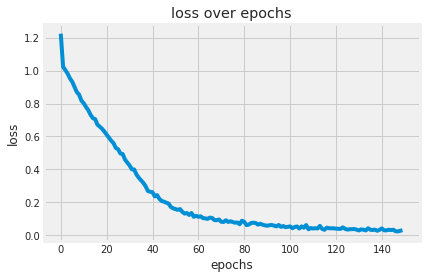

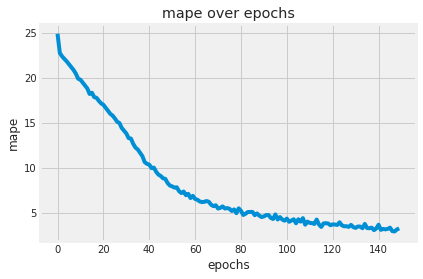

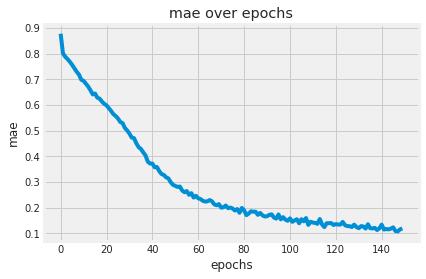

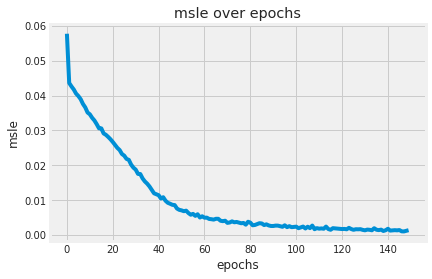

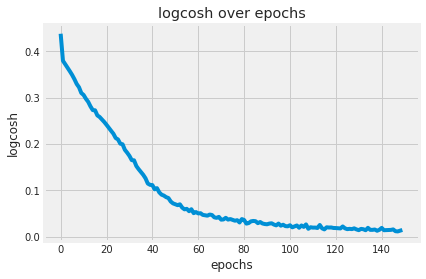

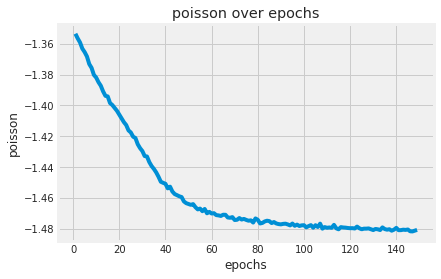

In [ ]:
print('MAE: '+ str(mae) + ' MSE: '+ str(mse))
fit = history.history
scores = model.evaluate(X_train_LSTM, y_train)
mae = scores[0]
mse = scores[1]
print('Mean absolute error: ' + str(mae) + '. Mean squared error: ' + str(mse) + '.')

for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred_LSTM = model.predict(X_test_LSTM) 

NameError: ignored

In [ ]:
MSE(y_test, pred_LSTM)

1.2812453140202806

In [ ]:
MAE((y_test), pred_LSTM)

0.8595505997360858

In [ ]:

from sklearn.metrics import mean_squared_error as MSE  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred_LSTM)) 
print("RMSE : % f" %(rmse)) 

RMSE :  1.131921


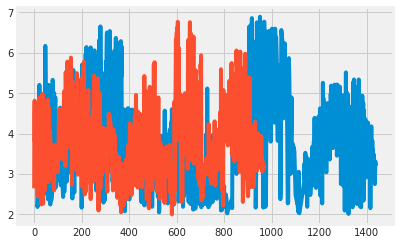

In [ ]:
trainPredict = model.predict(X_train_LSTM)

plt.plot(y_test)
plt.plot(pred_LSTM)
plt.show()

In [ ]:
r2_score(y_test, pred_LSTM)

-0.05315790098959505

In [ ]:
msle(y_test, pred_LSTM)

<tf.Tensor: shape=(970,), dtype=float32, numpy=
array([0.12130675, 0.06819262, 0.09100941, 0.05079155, 0.06910249,
       0.06536842, 0.05311858, 0.05432991, 0.05073475, 0.05854664,
       0.06741079, 0.08627287, 0.05619106, 0.06449752, 0.05325964,
       0.15447788, 0.08789488, 0.08744562, 0.12027897, 0.05110911,
       0.05072784, 0.06362236, 0.0964939 , 0.09518944, 0.07983432,
       0.12767313, 0.1368434 , 0.1094625 , 0.05111437, 0.05089523,
       0.05446912, 0.1961583 , 0.10548822, 0.08154625, 0.05116599,
       0.1031322 , 0.06087184, 0.15786168, 0.19132505, 0.09968405,
       0.05081389, 0.0545092 , 0.05096179, 0.05658939, 0.12930024,
       0.05077665, 0.07968474, 0.0663137 , 0.06367501, 0.06055677,
       0.05506843, 0.0525608 , 0.08352102, 0.06482316, 0.09249893,
       0.07695599, 0.09061819, 0.08032659, 0.09307089, 0.05573992,
       0.1011306 , 0.05897736, 0.07988259, 0.07397384, 0.09680122,
       0.05304767, 0.05165846, 0.05461745, 0.05087098, 0.05605499,
       0.05072

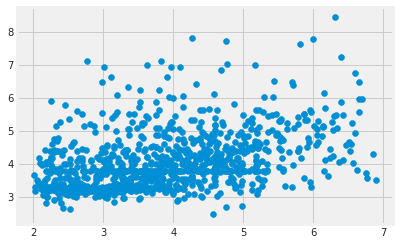

In [ ]:
plt.scatter(y_test, pred_Dense);


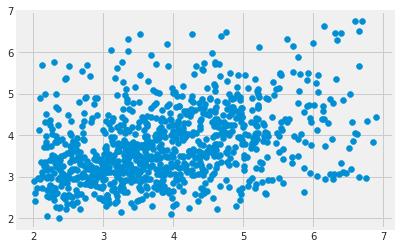

In [ ]:
plt.scatter(y_test, pred_LSTM);


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
 mean_absolute_percentage_error(y_test, pred_LSTM)

30.805270675020235

In [ ]:
r2_score(y_test, pred_LSTM)

-0.05315790098959505

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'higher right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


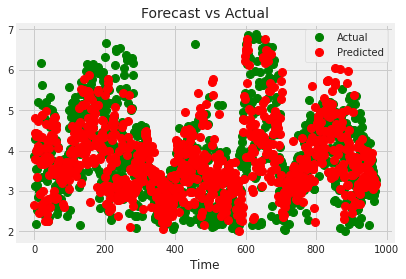

In [ ]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=8, label="Actual", color='green')
plt.plot(pd.Series(np.ravel(pred_LSTM)), "bo", markersize=8, label="Predicted", color='red')
plt.legend(loc="higher right")
plt.xlabel("Time")

plt.show()

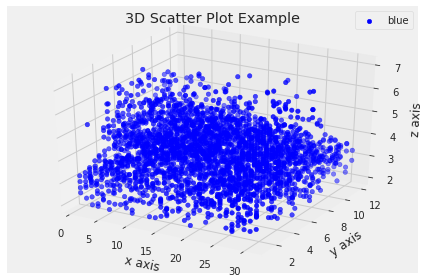

In [ ]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = trainData.Day
y1 = trainData.Month
z1 = trainData.Solar_radiation

ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')


ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
params = {'n_estimators': 400,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
from sklearn import datasets, ensemble

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

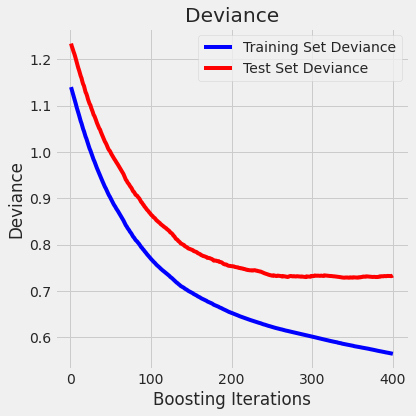

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, pred_Dense in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, pred_Dense)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [ ]:

train = np.array(list(zip(X_train, y_train)))
test = np.array(list(zip(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def create_dataset(n_X, look_back):
   dataX, dataY = [], []
   for i in range(len(n_X)-look_back):
      a = n_X[i:(i+look_back), ]
      dataX.append(a)
      dataY.append(n_X[i + look_back, ])
   return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, 2))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 2))

In [ ]:
X_train_GRU = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_GRU = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()

model.add(GRU(128, return_sequences=True, input_shape=(X_train_GRU.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))

model.add(GRU(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))

model.add(GRU(32, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(metrics=['mape','mae', 'msle', 'logcosh', 'poisson'], loss='mse', optimizer=Adam(learning_rate=0.001))

history = model.fit(X_train_GRU, y_train, epochs=100, batch_size=1)

Epoch 1/100
3027/3027 [==============================] - 111s 27ms/step - loss: 1.4241 - mape: 26.3146 - mae: 0.9420 - msle: 0.0686 - logcosh: 0.4879 - poisson: nan
Epoch 2/100
3027/3027 [==============================] - 83s 28ms/step - loss: 1.1953 - mape: 24.3443 - mae: 0.8661 - msle: 0.0514 - logcosh: 0.4290 - poisson: nan
Epoch 3/100
3027/3027 [==============================] - 83s 27ms/step - loss: 1.1269 - mape: 23.5260 - mae: 0.8377 - msle: 0.0479 - logcosh: 0.4090 - poisson: -1.3393
Epoch 4/100
3027/3027 [==============================] - 83s 28ms/step - loss: 1.1095 - mape: 23.3599 - mae: 0.8331 - msle: 0.0473 - logcosh: 0.4046 - poisson: -1.3414
Epoch 5/100
3027/3027 [==============================] - 83s 27ms/step - loss: 1.0865 - mape: 22.9456 - mae: 0.8187 - msle: 0.0469 - logcosh: 0.3918 - poisson: nan
Epoch 6/100
3027/3027 [==============================] - 83s 27ms/step - loss: 1.0168 - mape: 22.5353 - mae: 0.8010 - msle: 0.0434 - logcosh: 0.3772 - poisson: -1.3540
Epo

In [ ]:
pred_GRU = model.predict(X_test_GRU) 

In [ ]:
model.load_weights('LSTMBasic2.h5')
pred_LSTM2 = model.predict(X_test)

In [ ]:
MSE(y_test, pred_GRU)


0.9793434948549288

In [ ]:
MAE((y_test), pred_GRU)


0.7785929181234615

In [ ]:
from sklearn.metrics import mean_squared_error as MSE  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred_GRU)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.989618


In [ ]:
mean_absolute_percentage_error(y_test, pred_GRU)

28.638608733532028

In [ ]:
trainPredict = model.predict(X_train_LSTM2)

plt.plot(y_test)
plt.plot(pred_LSTM2)
plt.show()


In [ ]:
msle(y_test, pred_LSTM2)


In [ ]:
 mean_absolute_percentage_error(y_test, pred_LSTM2)

In [ ]:
r2_score(y_test, pred_GRU)

0.19499932752698046

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'higher right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


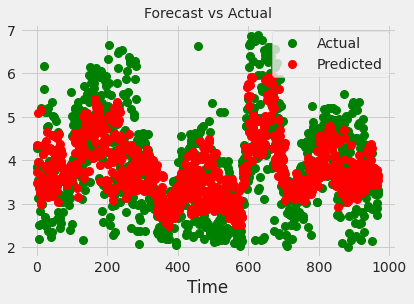

In [ ]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=8, label="Actual", color='green')
plt.plot(pd.Series(np.ravel(pred_GRU)), "bo", markersize=8, label="Predicted", color='red')
plt.legend(loc="higher right")
plt.xlabel("Time")

plt.show()

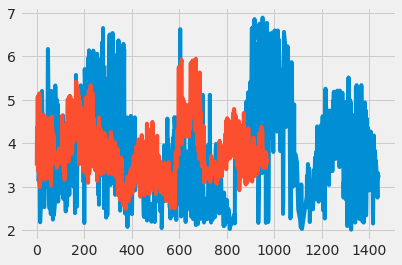

In [ ]:
trainPredict = model.predict(X_train_GRU)

plt.plot(y_test)
plt.plot(pred_GRU)
plt.show()